In [1]:
import pandas as pd

In [2]:
# import Giant Bomb
gb = pd.read_csv("giantbomb/giantbomb_reviews.csv", encoding='utf-8')

In [4]:
# import IGN
colHeader = ['game','date','reviewer','link','review']
IGN = pd.read_csv('IGN_1.csv', names = colHeader)
IGN['site'] = 'IGN'

In [67]:
# import Game Spot
colHeader2 = ['reviewer', 'date', 'game', 'link', 'score', 'platforms', 'review']
gamespot = pd.read_csv('gamespot/GAMESPOT_UPDATED.csv', names = colHeader2)
gamespot['site'] = 'GameSpot'
gamespot['score_100'] = 10*gamespot['score']

In [68]:
# convert date columns to datetime
gamespot["date"] = pd.to_datetime(gamespot.date, dayfirst=True)
IGN["date"] = pd.to_datetime(IGN.date, dayfirst=True)
gb["date"] = pd.to_datetime(gb.date, dayfirst=False)

In [69]:
results = pd.concat([gb, IGN, gamespot], ignore_index=True)

In [70]:
results.to_csv('results.csv', encoding='utf-8', index=False)

In [8]:
results.shape

(1361, 9)

In [11]:
from bs4 import BeautifulSoup
import urllib2
import requests
import re
import os
import numpy as np

In [12]:
gb_means = gb
gb_means['review_length'] = np.nan


In [13]:
for index, row in gb_means.iterrows():
    gb_means['review_length'][index] = len(row['review'].split())

C:\Users\Victor\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [37]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from matplotlib import rcParams
# Set inline graph size and font size
rcParams['figure.figsize'] = (24, 24)
rcParams['font.size'] = 12
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

In [14]:
grouped = gb_means.groupby(['site', 'reviewer'])
calculated_means = grouped.mean()

In [15]:
results['review_length'] = np.nan
for index, row in results.iterrows():
    results.loc[index, 'review_length'] = len(row['review'].split())

In [16]:
# group by site theen reviewer
grouped = results.groupby(['site', 'reviewer'])
# calculate mean of each review's scores and review lengths
calculated_means = grouped.mean()
# find number or reviews per reviewer
grouped_size = grouped.size().order()

by_reviewer_summary = grouped['review_length'].agg([np.sum, np.mean, np.std])


In [17]:
# compute summary statistics on review length by reviewer
by_reviewer_summary = grouped['review_length'].agg([np.sum, np.mean, np.std])


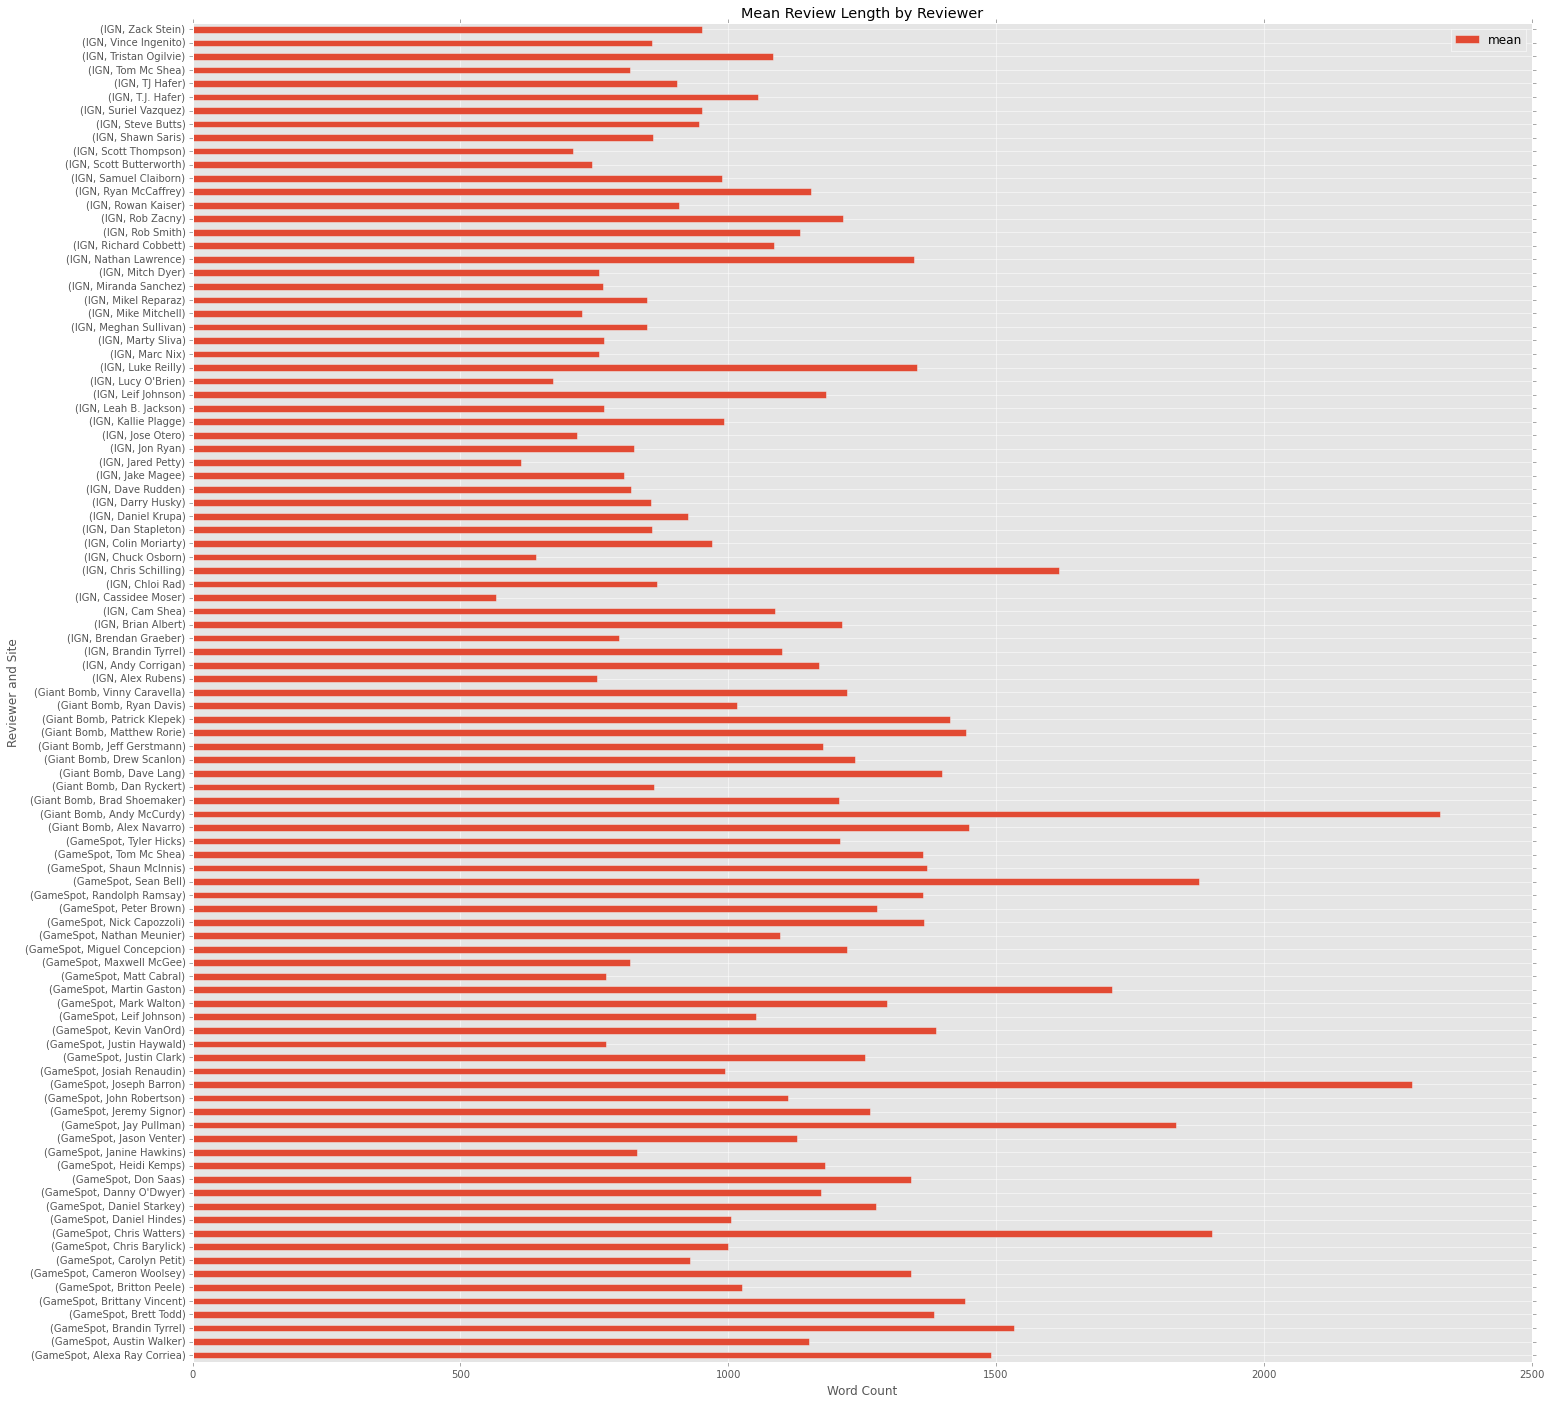

In [38]:
# bar chart by mean review length
by_reviewer_summary[['mean']].plot(kind='barh' )

plt.title("Mean Review Length by Reviewer") 
plt.xlabel("Word Count")
plt.ylabel("Reviewer and Site") 
plt.savefig('foo.png')

In [31]:
# group by site
by_site = results.groupby(['site'])
# summarize review length statistics sum, mean and standard deviation
by_site_summary = by_site['review_length'].agg([np.sum, np.mean, np.std])
print by_site_summary

               sum         mean         std
site                                       
GameSpot    524649  1249.164286  415.072647
Giant Bomb  800745  1215.091047  465.193875
IGN         252990   897.127660  311.810848


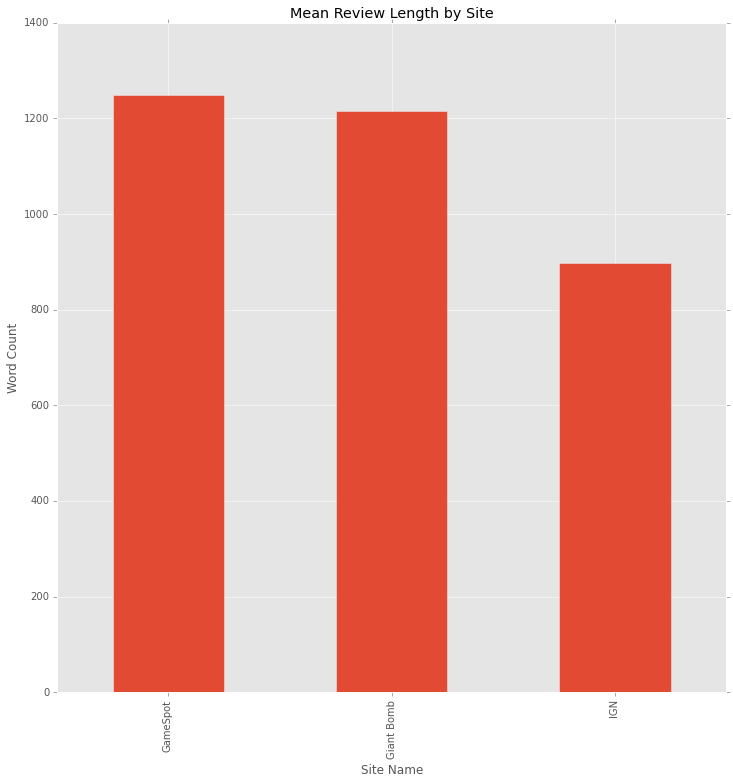

In [35]:
# bar chart by mean review length
by_site_summary['mean'].plot(kind='bar')

plt.title("Mean Review Length by Site") 
plt.xlabel("Site Name")
plt.ylabel("Word Count") 


In [50]:
calculated_means.to_csv('calculated_means.csv', encoding='utf-8', index=True)

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

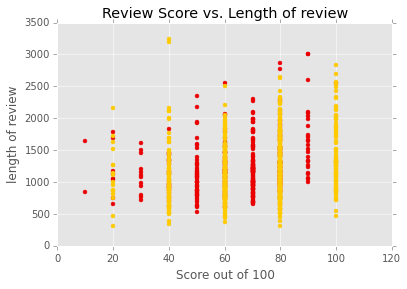

In [53]:
# get scatter of scores and review length
x = results['score_100']
y = results['review_length']

# Get unique names of
uniq = list(set(results['site']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = results['site'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i))

plt.xlabel('Score out of 100')
plt.ylabel('length of review')
plt.title('Review Score vs. Length of review')
plt.legend()
plt.show()
plt.savefig('foo.png')

In [54]:
grouped = results.groupby(['site', 'reviewer'])
calculated_means = grouped.mean().median()

In [55]:
sites = ['Giant Bomb', 'IGN', 'GameSpot']

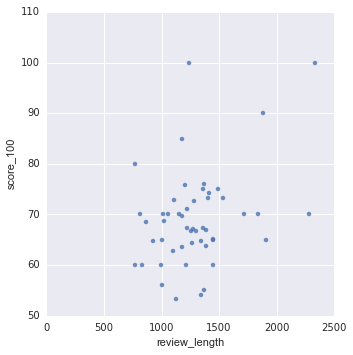

In [75]:
import seaborn as sns
sns.lmplot("review_length", "score_100", data=calculated_means, fit_reg=False)

In [83]:
groups = results.groupby(['site'])
groups_mean = groups.mean()

In [84]:
groups_mean

,review_length,score,score_100
site,,,
GameSpot,NaN,6.561905,65.619048
Giant Bomb,1215.091047,3.525038,70.500759
IGN,NaN,NaN,NaN


In [82]:
groups.reviewer.nunique()

site
GameSpot      39
Giant Bomb    11
IGN           49
Name: reviewer, dtype: int64

In [88]:
groups.game.nunique()

site
GameSpot      387
Giant Bomb    639
IGN           275
Name: game, dtype: int64

In [89]:
groups.head()

,date,game,link,platforms,review,review_length,reviewer,score,score_100,site
0,2008-05-23 13:00:00,SingStar,http://www.giantbomb.com/api/review/1900-1/,PlayStation 3,All these karaoke video games have got it all ...,950,Jeff Gerstmann,4,80,Giant Bomb
1,2008-05-20 17:00:00,Haze,http://www.giantbomb.com/api/review/1900-2/,PlayStation 3,Haze attempts to deal with the concept of wart...,1165,Jeff Gerstmann,2,40,Giant Bomb
2,2008-06-20 12:00:00,Metal Gear Solid 4: Guns of the Patriots,http://www.giantbomb.com/api/review/1900-3/,PlayStation 3,Metal Gear Solid 4: Guns of the Patriots is an...,1200,Brad Shoemaker,5,100,Giant Bomb
3,2008-02-29 12:00:00,Poker Smash,http://www.giantbomb.com/api/review/1900-4/,Xbox 360 Games Store,This week's Xbox Live Arcade release is Poker ...,492,Jeff Gerstmann,4,80,Giant Bomb
4,2008-07-06 12:00:00,Battlefield: Bad Company,http://www.giantbomb.com/api/review/1900-5/,Xbox 360,Lots of games have explosions--with all the co...,1320,Jeff Gerstmann,5,100,Giant Bomb
659,2015-04-21 00:00:00,Halo: Spartan Strike,http://www.ign.com/articles/2015/04/21/halo-sp...,NaN,"[""Halo has plenty of elements that don't work ...",NaN,Dave Rudden,NaN,NaN,IGN
660,2015-04-23 00:00:00,The Evil Within: The Consequence,http://www.ign.com/articles/2015/04/23/the-evi...,NaN,"[""A direct continuation of The Evil Withins su...",NaN,Lucy O'Brien,NaN,NaN,IGN
661,2015-04-22 00:00:00,State of Decay: Year One Survival Edition,http://www.ign.com/articles/2015/04/22/state-o...,NaN,['When I reviewed State of Decay on Xbox 360 o...,NaN,Ryan McCaffrey,NaN,NaN,IGN
662,2015-04-21 00:00:00,Crypt of the Necrodancer,http://www.ign.com/articles/2015/04/21/crypt-o...,NaN,['Crypt of the NecroDancer has one of the most...,NaN,Cam Shea,NaN,NaN,IGN
663,2015-04-13 00:00:00,I Am Bread,http://www.ign.com/articles/2015/04/13/i-am-br...,NaN,"[""As I nudge a slice of bread away from its lo...",NaN,Mikel Reparaz,NaN,NaN,IGN
